In [93]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import math 

In [94]:
df = pd.read_csv('processed_data/00-features.csv')
for col in df.columns:
  print("\'{:s}\',".format(col))

'city',
'floor',
'id',
'lat',
'lng',
'osm_amenity_points_in_0.001',
'osm_amenity_points_in_0.005',
'osm_amenity_points_in_0.0075',
'osm_amenity_points_in_0.01',
'osm_building_points_in_0.001',
'osm_building_points_in_0.005',
'osm_building_points_in_0.0075',
'osm_building_points_in_0.01',
'osm_catering_points_in_0.001',
'osm_catering_points_in_0.005',
'osm_catering_points_in_0.0075',
'osm_catering_points_in_0.01',
'osm_city_closest_dist',
'osm_city_nearest_name',
'osm_city_nearest_population',
'osm_crossing_closest_dist',
'osm_crossing_points_in_0.001',
'osm_crossing_points_in_0.005',
'osm_crossing_points_in_0.0075',
'osm_crossing_points_in_0.01',
'osm_culture_points_in_0.001',
'osm_culture_points_in_0.005',
'osm_culture_points_in_0.0075',
'osm_culture_points_in_0.01',
'osm_finance_points_in_0.001',
'osm_finance_points_in_0.005',
'osm_finance_points_in_0.0075',
'osm_finance_points_in_0.01',
'osm_healthcare_points_in_0.005',
'osm_healthcare_points_in_0.0075',
'osm_healthcare_points_in_0.

In [95]:
df = pd.read_csv('processed_data/00-features.csv')

columns = [
# 'city',
# 'floor',
# 'id',
# 'lat',
# 'lng',
# 'osm_amenity_points_in_0.001',
# 'osm_amenity_points_in_0.005',
# 'osm_amenity_points_in_0.0075',
# 'osm_amenity_points_in_0.01',
# 'osm_building_points_in_0.001',
# 'osm_building_points_in_0.005',
# 'osm_building_points_in_0.0075',
# 'osm_building_points_in_0.01',
# 'osm_catering_points_in_0.001',
# 'osm_catering_points_in_0.005',
# 'osm_catering_points_in_0.0075',
# 'osm_catering_points_in_0.01',
# 'osm_city_closest_dist',
# 'osm_city_nearest_name',
# 'osm_city_nearest_population',
# 'osm_crossing_closest_dist',
# 'osm_crossing_points_in_0.001',
# 'osm_crossing_points_in_0.005',
# 'osm_crossing_points_in_0.0075',
# 'osm_crossing_points_in_0.01',
# 'osm_culture_points_in_0.001',
# 'osm_culture_points_in_0.005',
# 'osm_culture_points_in_0.0075',
# 'osm_culture_points_in_0.01',
# 'osm_finance_points_in_0.001',
# 'osm_finance_points_in_0.005',
# 'osm_finance_points_in_0.0075',
# 'osm_finance_points_in_0.01',
# 'osm_healthcare_points_in_0.005',
# 'osm_healthcare_points_in_0.0075',
# 'osm_healthcare_points_in_0.01',
# 'osm_historic_points_in_0.005',
# 'osm_historic_points_in_0.0075',
# 'osm_historic_points_in_0.01',
# 'osm_hotels_points_in_0.005',
# 'osm_hotels_points_in_0.0075',
# 'osm_hotels_points_in_0.01',
# 'osm_leisure_points_in_0.005',
# 'osm_leisure_points_in_0.0075',
# 'osm_leisure_points_in_0.01',
# 'osm_offices_points_in_0.001',
# 'osm_offices_points_in_0.005',
# 'osm_offices_points_in_0.0075',
# 'osm_offices_points_in_0.01',
# 'osm_shops_points_in_0.001',
# 'osm_shops_points_in_0.005',
# 'osm_shops_points_in_0.0075',
# 'osm_shops_points_in_0.01',
# 'osm_subway_closest_dist',
# 'osm_train_stop_closest_dist',
# 'osm_train_stop_points_in_0.005',
# 'osm_train_stop_points_in_0.0075',
# 'osm_train_stop_points_in_0.01',
# 'osm_transport_stop_closest_dist',
# 'osm_transport_stop_points_in_0.005',
# 'osm_transport_stop_points_in_0.0075',
# 'osm_transport_stop_points_in_0.01',
'per_square_meter_price',
# 'reform_count_of_houses_1000',
# 'reform_count_of_houses_500',
# 'reform_house_population_1000',
# 'reform_house_population_500',
# 'reform_mean_floor_count_1000',
# 'reform_mean_floor_count_500',
# 'reform_mean_year_building_1000',
# 'reform_mean_year_building_500',
# 'region',
# 'total_square',
# 'street',
# 'date',
# 'realty_type',
'city_moskow',
'city_saint_petersburg',
'city_krasnodar',
'city_ekaterinburg',
'city_novosibirsk',
'city_chelyabinsk',
'city_samara',
'city_kazan',
'city_tymen',
'city_ufa',
'city_nino',
'city_rod',
'city_medium',
'city_small',
'city_little',
# 'amenity',
# 'amenity_ln',
# 'amenity_ln_center',
'amenity_ln_center_norm',
# 'osm_building_points_modified_in_0_001',
# 'osm_building_points_modified_in_0_005',
# 'osm_building_points_modified_in_0_0075',
# 'osm_building_points_modified_in_0_01',
# 'building',
# 'building_ln',
# 'catering',
# 'catering_ln',
# 'catering_ln_center',
'catering_ln_center_norm',
# 'city_closest_dist_ln',
# 'city_closest_dist_ln_center',
'city_closest_dist_ln_center_norm',
'nearest_city_moskow',
'nearest_city_saint_petersburg',
'nearest_city_krasnodar',
'nearest_city_ekaterinburg',
'nearest_city_novosibirsk',
'nearest_city_chelyabinsk',
'nearest_city_samara',
'nearest_city_kazan',
'nearest_city_tymen',
'nearest_city_podolsk',
'nearest_city_ufa',
'nearest_city_nino',
'nearest_city_rod',
'nearest_city_medium',
'nearest_city_small',
'nearest_city_little',
# 'crossing',
# 'crossing_ln',
# 'crossing_ln_center',
'crossing_ln_center_norm',
# 'finance',
# 'healthcare',
# 'healthcare_ln',
# 'healthcare_ln_center',
# 'healthcare_ln_center_norm',
# 'shops',
# 'shops_ln',
# 'shops_ln_center',
'shops_ln_center_norm',
'subway_in_100m',
'subway_in_500m',
'subway_in_1500m',
'subway_far_away',
'train_stop_in_1_5',
'train_stop_in_2_55',
'train_stop_in_5_2',
'train_stop_far_away',
'transport_stop_ln_center_norm',
'reform_count_of_houses_ln_center_norm',
'reform_house_population_ln_center_norm',
# 'reform_mean_year_building_1000_before_1600',
# 'reform_mean_year_building_1000_before_1900',
'reform_mean_year_building_1000_last_century_center_norm',
'total_square_ln_center_norm',
'yyyyMM',
'realty_type'
]

df1 = df[columns]
df1.describe()

df1 = pd.get_dummies(df1)

df1 = df1.assign(
  per_square_meter_price=df1.per_square_meter_price.apply(math.log1p)
)

for col in df1.columns.values:
  if col.startswith('yyyyMM'):
    df1[col] = df1[col] * 1000

df1.info()

train, test = train_test_split(df1, test_size=0.5)
target_column = 'per_square_meter_price'

train_x, train_y = train.drop(target_column, axis=1), train[target_column]
test_x, test_y = test.drop(target_column, axis=1), test[target_column]

model = LinearRegression()
model.fit(train_x, train_y)

predict = model.predict(test_x)
real_predict = math.e ** predict
real_test = math.e ** test_y

print('MAPE:', mean_absolute_percentage_error(real_test, real_predict))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206474 entries, 0 to 206473
Data columns (total 59 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   per_square_meter_price                                   206474 non-null  float64
 1   city_moskow                                              206474 non-null  int64  
 2   city_saint_petersburg                                    206474 non-null  int64  
 3   city_krasnodar                                           206474 non-null  int64  
 4   city_ekaterinburg                                        206474 non-null  int64  
 5   city_novosibirsk                                         206474 non-null  int64  
 6   city_chelyabinsk                                         206474 non-null  int64  
 7   city_samara                                              206474 non-null  int64  
 8   city_kazan    

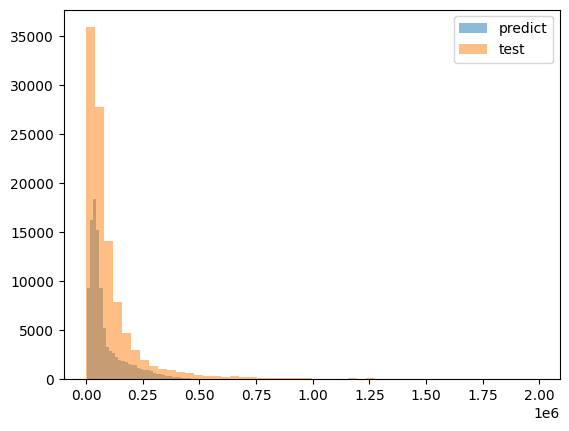

In [96]:
from matplotlib import pyplot as plt 

plt.hist(real_predict, label='predict', alpha=0.5, bins=50)
plt.hist(real_test, label='test', alpha=0.5, bins=50)
plt.legend()
plt.show()